In [1]:
# To resolve:
#(replicate decision tree lab here)
# 2. Visualising a decision tree

In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
loans = pd.read_csv('/Users/jiaminlim93/Desktop/GA Data Science Course/project/Data Science Project_Jiamin_/all_loans.csv', index_col='id')

/Users/jiaminlim93/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jiaminlim93/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Cleaning data

In [3]:
# Cleaning dataset - so there are no nas
df = loans.drop(['basket_amount','paid_amount','paid_date','planned_expiration_date','partner','loan_use'], axis=1)
df = df[df.posted_date.notnull()] # dropping any rows with posted date equals to na
df = df[df.name.notnull()]
df = df[df.loan_term_in_months.notnull()]
df.count()

name                      1108769
country                   1108769
status                    1108765
loan_amount               1108769
funded_amount             1108769
posted_date               1108769
funded_date               1061757
activity                  1108769
sector                    1108769
male_borrowers_count      1108769
female_borrowers_count    1108769
total_borrowers_count     1108769
loan_term_in_months       1108769
dtype: int64

#### Creating variables

In [4]:
# 1 - Funded vs. expired variable
# Eliminate refunded and fundraising
df = df[df['status'].isin(['funded','expired'])]
df['status_bin']=np.where(df['status']=="expired",1,0)

In [5]:
# 2 - Binary variables for continent and sector
# Continent
countrydf = pd.read_csv('/Users/jiaminlim93/Desktop/GA Data Science Course/project/Data Science Project_Jiamin_/countrydataset.csv')
countrycontdf = pd.concat([countrydf['country'],countrydf['C']], axis=1)
countrycontdf
df = pd.merge(df, countrycontdf, on='country', how='left')

contdummies = pd.get_dummies(df['C'])
contdummies.head()

# Sector
sectordummies = pd.get_dummies(df['sector'])
sectordummies.head()
df = pd.concat([df,contdummies,sectordummies], axis=1)
#df.count()

In [6]:
# 4 - Posted date to year
from datetime import date
df['posted_date'] = pd.to_datetime(df['posted_date'], format='%d-%m-%Y %H:%M:%S')
df['posted_year'] = pd.DatetimeIndex(df['posted_date']).year

### Exploring data

In [7]:
# Some descriptive stats and plots
# df.groupby(['sector']).status_bin.mean().sort_values()
# df.groupby(['country']).status_bin.mean().sort_values().plot()
df.groupby(['posted_year', 'C']).status_bin.mean()
#df.groupby(['C']).status_bin.mean().plot()
df.count()

name                      1097276
country                   1097276
status                    1097276
loan_amount               1097276
funded_amount             1097276
posted_date               1097276
funded_date               1057000
activity                  1097276
sector                    1097276
male_borrowers_count      1097276
female_borrowers_count    1097276
total_borrowers_count     1097276
loan_term_in_months       1097276
status_bin                1097276
C                         1097046
AF                        1097276
AS                        1097276
EU                        1097276
NO                        1097276
OC                        1097276
SA                        1097276
Agriculture               1097276
Arts                      1097276
Clothing                  1097276
Construction              1097276
Education                 1097276
Entertainment             1097276
Food                      1097276
Health                    1097276
Housing       

### Creating a Decision tree

In [8]:
# Define x and y variables   
y=df['status_bin']
X=df.drop(['status_bin','name','country','status','funded_amount','posted_date','funded_date','activity','sector','C'], axis=1)


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status_bin, dtype: int64

#### Split into training and dataset and build the model

In [10]:
# Now, split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# Create a decision tree classifier object (start out with a small tree for interpretability)
dtree = tree.DecisionTreeClassifier(random_state=1, max_depth=10)

# Fit the decision tree classifier
treef = dtree.fit(X_train, y_train) # specifies the whole decision tree, can specify the depth though this default function does it auto

#### Confusion matrix

In [12]:
#%load confusion_matrix_nice.py
#from confusion_matrix_nice import plot_confusion_matrix
%run confusion_matrix_nice.JL

Confusion matrix, without normalization
[[264115    144]
 [  9911    149]]


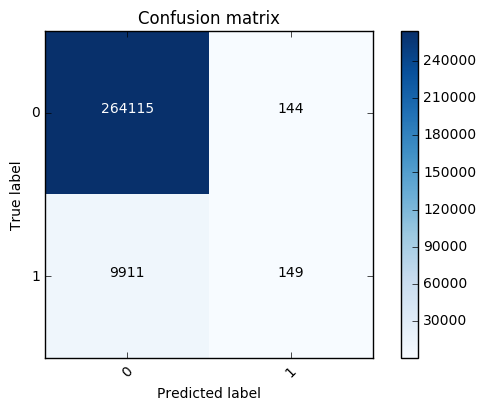

In [13]:
# get the predictions (not the probabilities)
y_pred_class = dtree.predict(X_test)

# plot an attractive confusion matrix
cnf_mat = metrics.confusion_matrix(y_test, y_pred_class, labels = df.status_bin.unique())
class_labels = df.status_bin.unique()
plt.figure()
plot_confusion_matrix(cnf_mat, class_labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
plt.show()

#### Evaluate

In [15]:
features = X_train.columns.tolist()
features

['loan_amount',
 'male_borrowers_count',
 'female_borrowers_count',
 'total_borrowers_count',
 'loan_term_in_months',
 'AF',
 'AS',
 'EU',
 'NO',
 'OC',
 'SA',
 'Agriculture',
 'Arts',
 'Clothing',
 'Construction',
 'Education',
 'Entertainment',
 'Food',
 'Health',
 'Housing',
 'Manufacturing',
 'Personal Use',
 'Retail',
 'Services',
 'Transportation',
 'Wholesale',
 'posted_year']

In [16]:
# Which features are the most important? - sex
dtree.feature_importances_

# Make a Dataframe out of the features and the importance measure for the features
pd.DataFrame(zip(features, dtree.feature_importances_)).sort_index(by=1, ascending=False)

/Users/jiaminlim93/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,0,1
26,posted_year,2.475752e-01
0,loan_amount,2.216452e-01
2,female_borrowers_count,1.696833e-01
4,loan_term_in_months,1.503608e-01
22,Retail,5.625458e-02
15,Education,4.436398e-02
19,Housing,1.875628e-02
6,AS,1.833270e-02
20,Manufacturing,1.330667e-02
13,Clothing,1.055410e-02


In [17]:
# Make predictions on the test set
preds = dtree.predict(X_test) #same as y_pred_class

# Calculate accuracy
metrics.accuracy_score(y_test, preds)

# Confusion matrix (in a table)
pd.crosstab(y_test, preds, rownames=['actual'], colnames=['predicted'])

# Make predictions on the test set using predict_proba; returns a list of predicted probabilities for the test set
probs = dtree.predict_proba(X_test)[:,1]

# Calculate the AUC metric
metrics.roc_auc_score(y_test, probs)


# Decision Trees have notorouisly high variance, so what can we do
# to better estimate the out of sample error of a high variance model?

0.9212408755983017

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
dtree = tree.DecisionTreeClassifier(random_state=1, max_depth=10)

# compare AUC using cross-validation
from sklearn.cross_validation import cross_val_score
print cross_val_score(logreg, y, X, cv=5, scoring='roc_auc').mean() #auc:area under the curve
print cross_val_score(dtree, y, X, cv=5, scoring='roc_auc').mean()

# so far logistic regression is winning..

/Users/jiaminlim93/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: bad input shape (877820, 27)

In [ ]:
metrics.accuracy_score(y_test, y_pred_class)

In [ ]:
# Spare code
# 2 - Country (NOTE: Implies ordering which isn't the case)
#from sklearn import preprocessing
#countrylabel = preprocessing.LabelEncoder()
#countrylabel.fit(df['country'])
#list(countrylabel.classes_)
#df['country_label']=countrylabel.transform(df['country']) 

# 3 - Sector (NOTE: Implies ordering which isn't the case)
#sectorlabel = preprocessing.LabelEncoder()
#sectorlabel.fit(df['sector'])
#list(sectorlabel.classes_)
#df['sector_label']=sectorlabel.transform(df['sector']) 